## 1. Cumulative distribution function

When using distributions to summarize numeric data, it is much more practical to define a function that operates on intervals rather than single values. The standard way of doing this is using the cumulative distribution function (CDF).

The cumulative distribution function (CDF) is a distribution function for continuous data $x$ that reports the proportion of the data below $a$ for all values of $a$: 
$$F(a) = \mathbb{P}(x\leq a) $$

For example, to determine the probability that a male student is taller than $70$ inches given a vector of male heights $x$, we can use the CDF: $$ \mathbb{P}(x > 70) = 1 - \mathbb{P}(x \leq 70) = 1 - F(70)$$

In [15]:
library(tidyverse)
library(dslabs)
data(heights)
x <- heights %>% filter(sex=="Male") %>% pull(height)

F <- function(a) mean(x <= a)    #define a function for computing CDF using x
1 - F(70)    # probability of male taller than 70 inches

[1] 0.3768473

Once a CDF is defined, we can use this to compute the probability of any subset. For instance, the probability that an observation is in between two values $a,b$ is $F(b)−F(a)$.

## 2. Theoretical (normal) distribution

$\textbf{Normal Distribution}$. $\verb|pnorm(a, avg, s)|$ gives the value of the cumulative distribution function $F(a)$ for the normal distribution defined by average $\verb|avg|$ and standard deviation $\verb|s|$.



If we are willing to use the normal approximation for height, we can estimate the distribution simply from the mean and standard deviation of our values.

We can estimate the probability that a male is taller than 70.5 inches using:

In [16]:
m <- mean(x)
s <- sd(x)
1 - pnorm(70.5, m, s)

[1] 0.371369

$\textbf{Discretization}$. If we treat the height data as discrete rather than categorical, we see that the data are not very useful because integer values are more common than expected due to rounding. This is called $\textit{discretization}$.

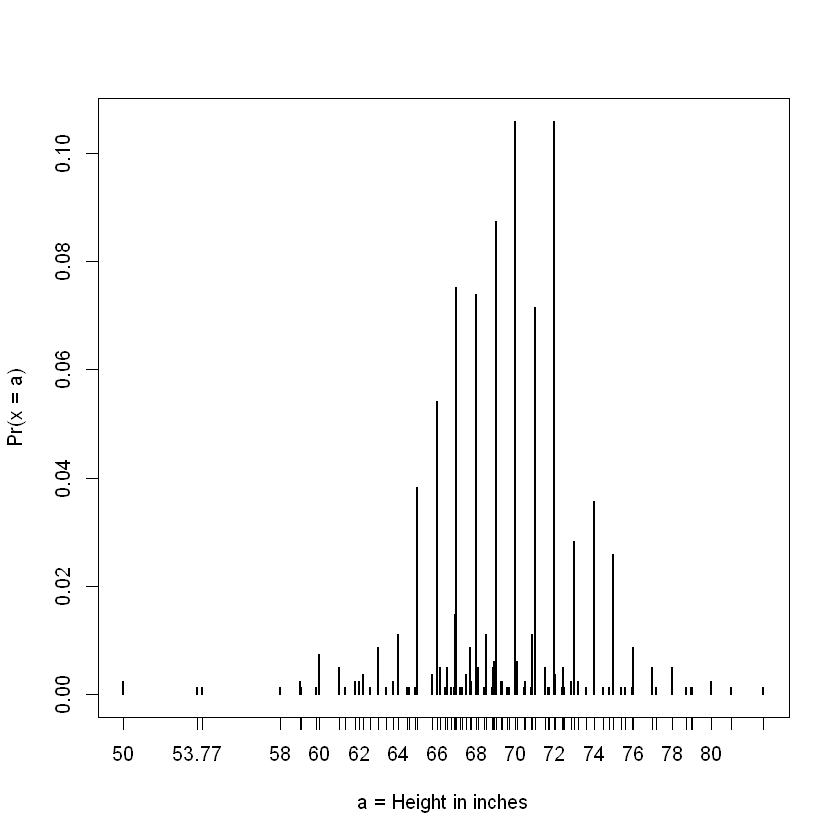

In [17]:
# plot distribution of exact heights in data
plot(prop.table(table(x)), xlab = "a = Height in inches", ylab = "Pr(x = a)")

With rounded data, the normal approximation is particularly useful when computing probabilities of intervals of length 1 that include exactly one integer.

In [18]:
# probabilities in actual data over length 1 ranges containing an integer
mean(x <= 68.5) - mean(x <= 67.5)
mean(x <= 69.5) - mean(x <= 68.5)
mean(x <= 70.5) - mean(x <= 69.5)

# probabilities in normal approximation match well
pnorm(68.5, mean(x), sd(x)) - pnorm(67.5, mean(x), sd(x))
pnorm(69.5, mean(x), sd(x)) - pnorm(68.5, mean(x), sd(x))
pnorm(70.5, mean(x), sd(x)) - pnorm(69.5, mean(x), sd(x))

# probabilities in actual data over other ranges don't match normal approx as well
mean(x <= 70.9) - mean(x <= 70.1)
pnorm(70.9, mean(x), sd(x)) - pnorm(70.1, mean(x), sd(x))

[1] 0.114532

[1] 0.1194581

[1] 0.1219212

[1] 0.1031077

[1] 0.1097121

[1] 0.1081743

[1] 0.02216749

[1] 0.08359562

## 3. Probability density

The quantity with the most similar interpretation to the probability of a single value (in discrete distribution) is the probability density function $f(x)$ (in continuous distribution). The probability density f(x) is defined such that the integral of $f(x)$ over a range gives the CDF of that range:
$$F(a) = \mathbb{P}(X \leq a) = \int_{-\infty}^a f(x) dx. $$

In $\verb|R|$, the probability density function for the normal distribution is given by $\verb|dnorm|()$. We will see uses of $\verb|dnorm|()$ in the future.

$\textbf{Plotting}$. We can use $\verb|dnorm|()$ to plot the density curve for the normal distribution. 

First, we generate a series of $z$-scores covering the typical range of the normal distribution.  Since we know $99.7\%$ of observations will be within $−3 \leq z \leq 3$, we can use a value of $z$ slightly larger than $3$ and this will cover most likely values of the normal distribution

Then, we calculate $f(z)$, which is $\verb|dnorm|()$ of the series of $z$-scores. Last, we plot $z$ against $f(z)$.

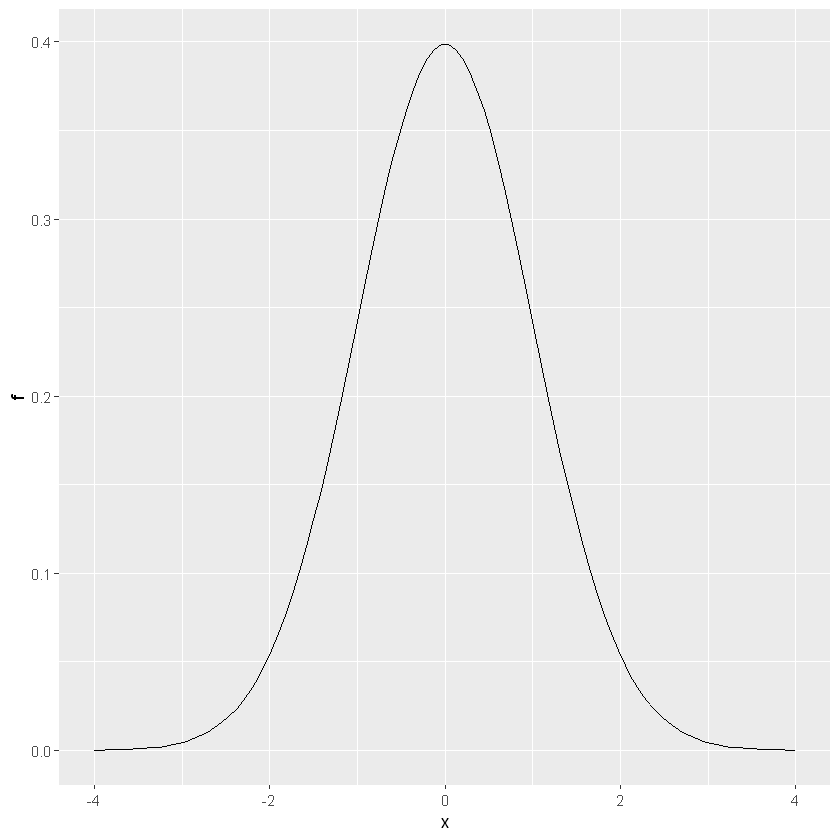

In [19]:
library(tidyverse)
x <- seq(-4, 4, length = 100)
data.frame(x, f = dnorm(x)) %>%
    ggplot(aes(x, f)) +
    geom_line()

Note that $\verb|dnorm|()$ gives densities for the standard normal distribution by default. Probabilities for alternative normal distributions with mean $\verb|mu|$ and standard deviation $\verb|sigma|$ can be evaluated with: $$\verb|dnorm(z, mu, sigma)| $$

## 4. Monte-Carlo simulations of continuous distributions

$\verb|rnorm(n, avg, s)|$ generates $\verb|n|$ random numbers from the normal distribution with average $\verb|avg|$ and standard deviation $\verb|s|$.

By generating random numbers from the normal distribution, we can simulate height data with similar properties to our dataset. Here we generate simulated height data using the normal distribution.

In [20]:
# generate simulated height data using normal distribution - both datasets should have n observations
n <- length(x)
avg <- mean(x)
s <- sd(x)
simulated_heights <- rnorm(n, avg, s)

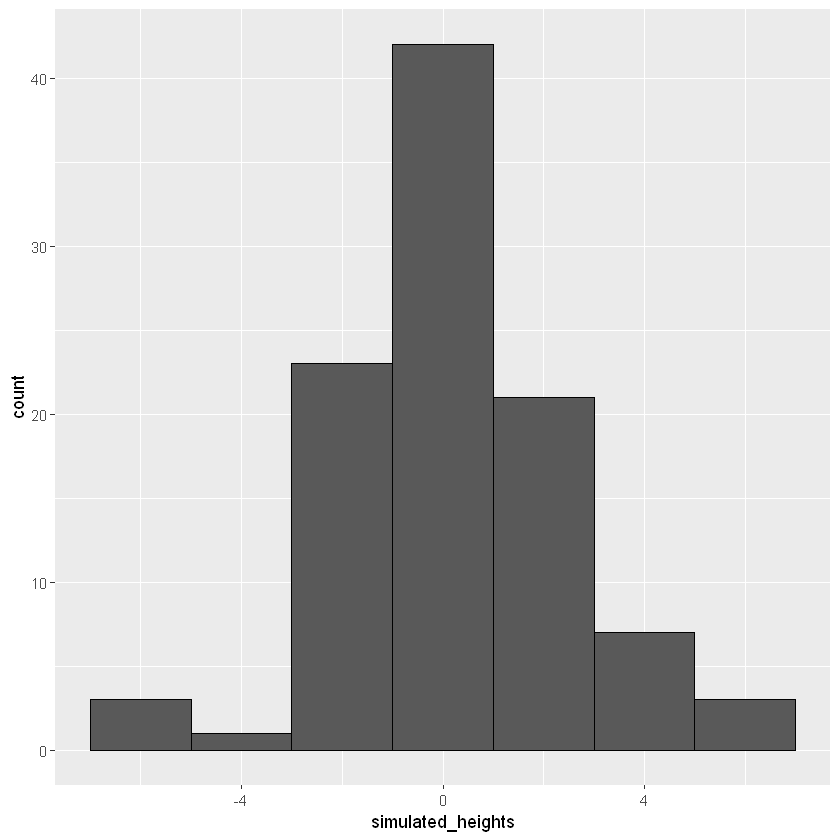

In [21]:
# plot distribution of simulated_heights
data.frame(simulated_heights = simulated_heights) %>%
    ggplot(aes(simulated_heights)) +
    geom_histogram(color="black", binwidth = 2)

This is one of the most useful functions in $\verb|R|$ as it will permit us to generate data that mimics natural events
and answers questions related to what could happen by chance by running Monte Carlo simulations.

If, for example, we pick $800$ males at random, what is the distribution of the tallest person? How rare is a seven footer in a group of $800$ males?

In [25]:
B <- 10000
tallest <- replicate(B, {
    simulated_data <- rnorm(800, avg, s)    # generate 800 normally distributed random heights
    max(simulated_data)    # determine the tallest height
})
mean(tallest >= 7*12)    # proportion of times that tallest person exceeded 7 feet (84 inches)

[1] 0

## 5. Other continuous distributions

You may encounter other continuous distributions (Student t, $\chi$-squared, exponential, gamma, beta, etc.). $\verb|R|$ provides functions for density ($\verb|d|$), quantile ($\verb|q|$), probability distribution ($\verb|p|$) and random number generation ($\verb|r|$) for many of these distributions.

Each distribution has a matching abbreviation (for example, $\verb|norm|()$ or $\verb|t|()$) that is paired with the related function abbreviations ($\verb|d, p, q, r|$) to create appropriate functions.

For example, use $\verb|rt|()$ to generate random numbers for a Monte-Carlo simulation using the Student t distribution.